In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pymatgen.core as mg
from pymatgen.core import Lattice, Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

# Convert CIF to JCPDS

## Input parameters

`cif` should exist in the `./cif` folder.  `jcpds` will be created in the `./jcpds` folder.

In [4]:
%ls ./cif

Fe25O32_80GPa.cif           MgSiO3_bm.cif
Fe2S.cif                    Ni2S.cif
Fe4O5_10GPa.cif             Ni3S2.cif
Fe5O6_11GPa.cif             eta-Fe2O3_64GPa.cif
Fe5O7_41GPa.cif             eta-Fe2O3_74GPa.cif
FeS2_mp-1522_primitive.cif  iota-Fe2O3_40.7GPa.cif
HP-Fe3O4_44GPa.cif          theta-Fe2O3_ 74GPa.cif


In [5]:
cif_name = 'Fe2S'

Elastic and thermal parameters.  Make changes for your phase.

In [36]:
k0 = 200. # 200.
k0p = 4.00 # 4.
alpha = 3.16e-5 # 1.e-5

The same file name will be used for `jcpds` file.

In [37]:
fn_cif = "./cif/"+cif_name+'.cif'
fn_jcpds = './jcpds/'+cif_name+'.jcpds'
comments_jcpds = cif_name

<font color='red'> __(NOTE)__ Make sure _symmetry_space_group_name_H-M is not `P1` below. </font>

In [38]:
!head {fn_cif}

data_Crystal
_audit_creation_method         'generated by CrystalMaker X for macOS'
_cell_length_a                   4.234000
_cell_length_b                   3.178000
_cell_length_c                   5.984000
_cell_angle_alpha               90.000000
_cell_angle_beta                90.000000
_cell_angle_gamma               90.000000

_symmetry_space_group_name_H-M     'P n m a'


<font color='red'> __Note:__ Make sure the pymatgen version is later than 2019.4.11. </font>

In [39]:
from pymatgen.core import __version__
print(__version__)


2025.10.7


In [40]:
wl_xray = 0.3344
xrange = (0,40)

In [41]:
verbose = True

In [42]:
import sys
sys.path.append('../../peakpo/')
sys.path.append('../local_modules/')
import ds_jcpds
import quick_plots as quick

## Read CIF

In [43]:
material = mg.Structure.from_file(fn_cif)

## Show CIF content

In [45]:
if verbose:
    print(material)

Full Formula (Fe8 S4)
Reduced Formula: Fe2S
abc   :   4.234000   3.178000   5.984000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (12)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Fe    0.6665  0.25  0.4304
  1  Fe    0.8335  0.75  0.9304
  2  Fe    0.3335  0.75  0.5696
  3  Fe    0.1665  0.25  0.0696
  4  Fe    0.4687  0.75  0.2053
  5  Fe    0.0313  0.25  0.7053
  6  Fe    0.5313  0.25  0.7947
  7  Fe    0.9687  0.75  0.2947
  8  S     0.7885  0.75  0.6052
  9  S     0.7115  0.25  0.1052
 10  S     0.2115  0.25  0.3948
 11  S     0.2885  0.75  0.8948


In [46]:
lattice = material.lattice
if verbose:
    print('Lattice parameters = ', lattice.a, lattice.b, lattice.c, \
          lattice.alpha, lattice.beta, lattice.gamma)
crystal_system = SpacegroupAnalyzer(material).get_crystal_system()
if verbose:
    print(crystal_system)

Lattice parameters =  4.234 3.178 5.984 90.0 90.0 90.0
orthorhombic


In [47]:
SpacegroupAnalyzer(material).get_space_group_symbol()

'Pnma'

In [48]:
from pymatgen.io.cif import CifParser
parser = CifParser(fn_cif)
structure = parser.get_structures()
structure

/var/folders/hq/thm59xl964s5d51mg8d1jt1m0000gp/T/ipykernel_12388/1500772923.py:3: FutureWarning: get_structures is deprecated; use parse_structures in pymatgen.io.cif instead.
The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
  structure = parser.get_structures()


[Structure Summary
 Lattice
     abc : 3.178 4.234 5.984
  angles : 90.0 90.0 90.0
  volume : 80.51862156799999
       A : 1.9459637638451443e-16 -3.178 -1.9459637638451443e-16
       B : -4.234 0.0 -2.5925772737949465e-16
       C : 0.0 0.0 -5.984
     pbc : True True True
 PeriodicSite: Site1 (Fe) (-1.412, -2.383, -3.408) [0.75, 0.3335, 0.5696]
 PeriodicSite: Site1 (Fe) (-0.705, -0.7945, -0.4165) [0.25, 0.1665, 0.0696]
 PeriodicSite: Site1 (Fe) (-2.822, -0.7945, -2.576) [0.25, 0.6665, 0.4304]
 PeriodicSite: Site1 (Fe) (-3.529, -2.383, -5.568) [0.75, 0.8335, 0.9304]
 PeriodicSite: Site2 (Fe) (-2.25, -0.7945, -4.755) [0.25, 0.5313, 0.7947]
 PeriodicSite: Site2 (Fe) (-4.101, -2.383, -1.763) [0.75, 0.9687, 0.2947]
 PeriodicSite: Site2 (Fe) (-1.984, -2.383, -1.229) [0.75, 0.4687, 0.2053]
 PeriodicSite: Site2 (Fe) (-0.1325, -0.7945, -4.221) [0.25, 0.0313, 0.7053]
 PeriodicSite: Site3 (S) (-0.8955, -0.7945, -2.362) [0.25, 0.2115, 0.3948]
 PeriodicSite: Site3 (S) (-1.222, -2.383, -5.354) [0.

In [49]:
with open(fn_cif, 'r') as f:
    cif_data = f.readlines()

In [50]:
cif_data

['data_Crystal\n',
 "_audit_creation_method         'generated by CrystalMaker X for macOS'\n",
 '_cell_length_a                   4.234000\n',
 '_cell_length_b                   3.178000\n',
 '_cell_length_c                   5.984000\n',
 '_cell_angle_alpha               90.000000\n',
 '_cell_angle_beta                90.000000\n',
 '_cell_angle_gamma               90.000000\n',
 '\n',
 "_symmetry_space_group_name_H-M     'P n m a'\n",
 '\n',
 'loop_\n',
 '_symmetry_equiv_pos_as_xyz\n',
 "'+x,+y,+z'\n",
 "'1/2-x,-y,1/2+z'\n",
 "'-x,1/2+y,-z'\n",
 "'1/2+x,1/2-y,1/2-z'\n",
 "'-x,-y,-z'\n",
 "'1/2+x,+y,1/2-z'\n",
 "'+x,1/2-y,+z'\n",
 "'1/2-x,1/2+y,1/2+z'\n",
 '\n',
 'loop_\n',
 '_atom_site_label\n',
 '_atom_site_type_symbol\n',
 '_atom_site_occupancy\n',
 '_atom_site_fract_x\n',
 '_atom_site_fract_y\n',
 '_atom_site_fract_z\n',
 ' Site1  Fe 1.0  0.6665  0.25  0.4304\n',
 ' Site2  Fe 1.0  0.4687  0.75  0.2053\n',
 ' Site3  S 1.0  0.7885  0.75  0.6052\n',
 '\n']

In [51]:
for line in cif_data:
    if '_symmetry_space_group_name_H-M' in line:
        a = line.replace('_symmetry_space_group_name_H-M', '')
        if 'P 1' in a:
            print('Got it')

## Get diffraction pattern

In [52]:
c = XRDCalculator(wavelength=wl_xray)

In [53]:
pattern = c.get_pattern(material, two_theta_range = xrange)

## Extract twotheta, d-sp, int, hkl

In [54]:
h = []; k = []; l = []
for i in range(pattern.hkls.__len__()):
    h.append(pattern.hkls[i][0]['hkl'][0])
    k.append(pattern.hkls[i][0]['hkl'][1])
    l.append(pattern.hkls[i][0]['hkl'][2])

In [55]:
d_lines = [pattern.x, pattern.d_hkls, pattern.y, h, k, l ]
diff_lines = np.transpose(np.asarray(d_lines))

## Table output

We can make a nice looking table using the `pandas` package.  `pandas` is more than looking-good table producer.  It is a powerful statistics package popular in data science.

In [56]:
if verbose:
    table = pd.DataFrame(data = diff_lines,    # values
        columns=['Two Theta', 'd-spacing', 'intensity', 'h', 'k', 'l'])  
    # 1st row as the column names
    table.head()

## Plot peak positions generated from pymatgen

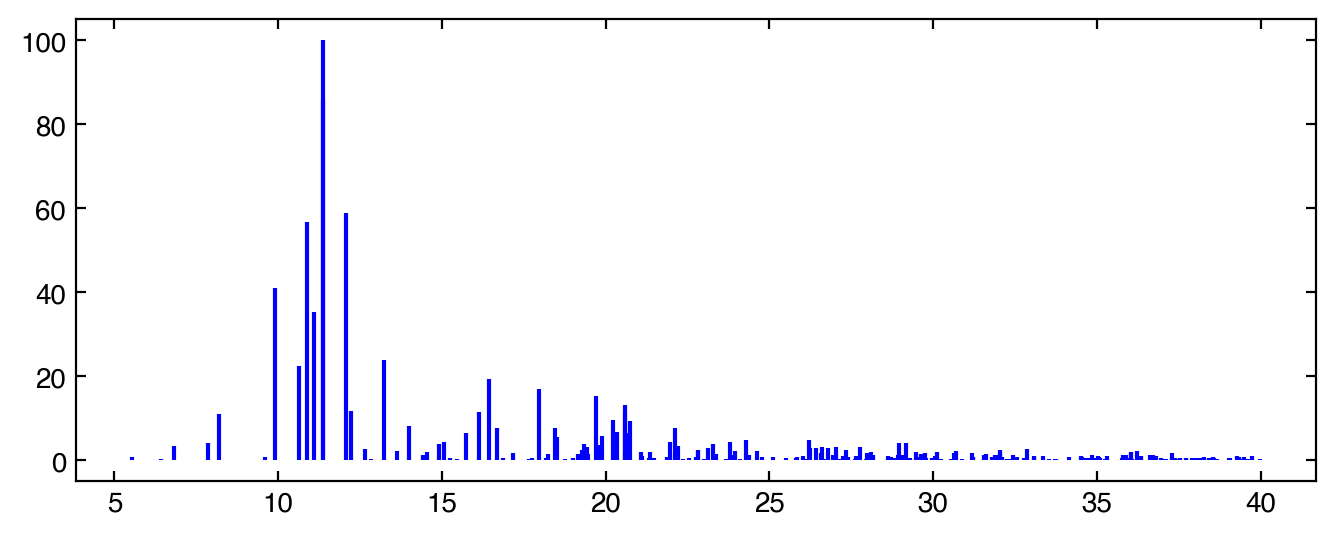

In [57]:
f, ax = plt.subplots(figsize=(8,3))
ax.vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b');

## Convert to JCPDS

Setup an `jcpds` object from a `cif` file

In [58]:
material_jcpds = ds_jcpds.JCPDS()
material_jcpds.set_from_cif(fn_cif, k0, k0p, \
                      thermal_expansion=alpha, 
                        two_theta_range=xrange)

True

Calculate diffraction pattern at a pressure.

In [59]:
material_jcpds.cal_dsp(pressure = 100., temperature = 1000.)
dl = material_jcpds.get_DiffractionLines()
tth, inten = material_jcpds.get_tthVSint(wl_xray)

(7.5, 20.0)

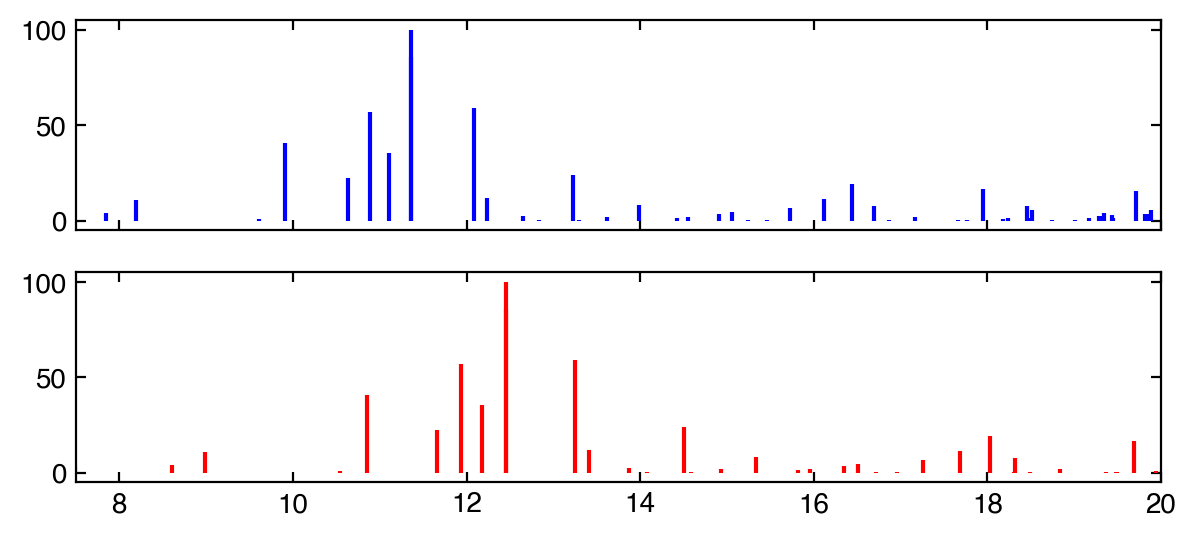

In [61]:
f, ax = plt.subplots(2, 1, figsize=(7,3), sharex=True)
ax[0].vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b')
ax[1].vlines(tth, 0., inten, color = 'r')
ax[0].set_xlim(7.5,20)

## Save to a JCPDS file

In [62]:
material_jcpds.write_to_file(fn_jcpds, comments=comments_jcpds)

In [63]:
!head {fn_jcpds}

4
Fe2S
4   200.00   4.00 
4.23400   3.17800   5.98400 
3.1600e-05 
d-spacing    I/I0     h   k   l 
3.456319   0.84   1.0   0.0   1.0 
2.992000   0.24   0.0   0.0   2.0 
2.806736   3.47   0.0   1.0   1.0 
2.443472   4.01   1.0   0.0   2.0 


# Read back the written JCPDS for test

In [64]:
material_test = ds_jcpds.JCPDS(filename = fn_jcpds)

In [65]:
material_test.cal_dsp(pressure = 100.)
material_test.get_DiffractionLines()
tth, inten = material_test.get_tthVSint(wl_xray)

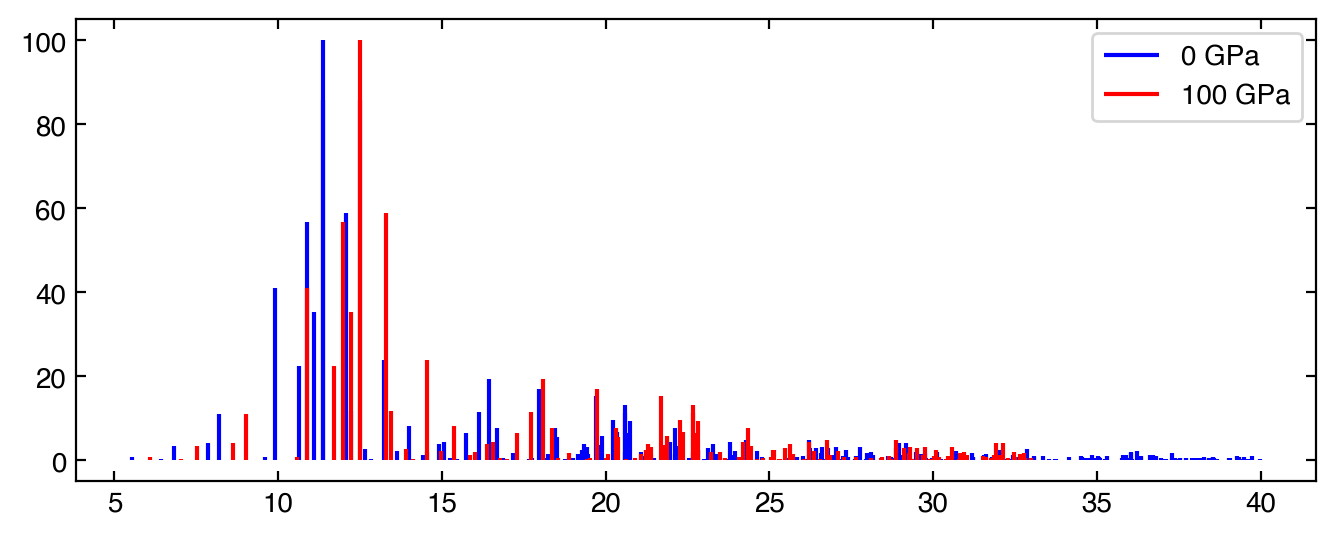

In [66]:
f = plt.figure(figsize=(8,3))
plt.vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b', label='0 GPa')
plt.vlines(tth, 0., inten, color = 'r', label='100 GPa')
plt.legend();

# Check for possible errors in conversion

The most common error in converting `cif` to `jcpds` is incorrect symmetry conversion.  The cell below check the symmetry conversion.

In [35]:
if crystal_system != material_jcpds.symmetry:
    print('symmetry is different')
else:
    print('symmetry seems to be fine')

symmetry seems to be fine
